In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd
import numpy as np

from apidata import (
    closing_prices,
    optimize_portfolio,
    backtest_portfolio,
    evaluate_portfolio,
)

In [2]:
# 1: <Good Performance> Select Stocks For Inclusion in Portfolio
#selected_stocks = ["AMZN","JPM","FCX","HAL","F"]

selected_stocks = "GOOG,JPM,HAL".split(",")

In [6]:
# 2: Optimize Portfolio Around List of Provided Stocks
portfolio = optimize_portfolio(selected_stocks, simulations=1000)

[0] Retrieving Stock Data: GOOG
[1] Retrieving Stock Data: JPM
[2] Retrieving Stock Data: HAL

Optimizing Portfolio Weights >> Simulations: x 1000

Optimized Portfolio Weights:
GOOG        0.4683
HAL         0.0001
JPM         0.5317
Return      0.1464
Sharpe      0.2670
Variance    0.1813
Name: 434, dtype: float64


In [7]:
# 3: Back-Test Performance of Optimized Portfolio Using Historical Data
performance = backtest_portfolio(portfolio)


Ticker: GOOG 	Portfolio Weight: 0.4683
                GOOG
Date                
2014-03-28  0.001281
2014-03-31 -0.002532
2014-04-01  0.008490
2014-04-02 -0.000132
2014-04-03  0.002258

Ticker: HAL 	Portfolio Weight: 0.0001
                     HAL
Date                    
2014-01-03  2.396646e-07
2014-01-06  3.782981e-07
2014-01-07 -2.387586e-07
2014-01-08 -1.404236e-06
2014-01-09  2.219757e-07

Ticker: JPM 	Portfolio Weight: 0.5317
                 JPM
Date                
2014-01-03  0.004095
2014-01-06  0.003073
2014-01-07 -0.006164
2014-01-08  0.004991
2014-01-09 -0.000994

[Historic] Portfolio Performance:
                 GOOG           HAL       JPM      RTNp
Date                                                  
2014-03-28  0.001281  2.331029e-06  0.001064  0.002347
2014-03-31 -0.002532 -9.632521e-07  0.005900  0.003367
2014-04-01  0.008490  1.248751e-06 -0.000350  0.008141
2014-04-02 -0.000132  5.018411e-07 -0.001668 -0.001799
2014-04-03  0.002258 -2.171554e-07  0.001580  0

In [15]:
performance.head()

,GOOG,HAL,JPM,RTNp
Date,,,,
2014-03-28,0.001281,2.331029e-06,0.001064,0.002347
2014-03-31,-0.002532,-9.632521e-07,0.005900,0.003367
2014-04-01,0.008490,1.248751e-06,-0.000350,0.008141
2014-04-02,-0.000132,5.018411e-07,-0.001668,-0.001799
2014-04-03,0.002258,-2.171554e-07,0.001580,0.003837


In [8]:
# 4: Evaluate Portfolio Historic Performance Against Benchmark
pfolio_eval = evaluate_portfolio(performance)

                GOOG           HAL       JPM      RTNp      RTNm    Excess  \
Date                                                                         
2014-03-28  0.001281  2.331029e-06  0.001064  0.002347 -0.026811  0.029159   
2014-03-31 -0.002532 -9.632521e-07  0.005900  0.003367  0.019605 -0.016238   
2014-04-01  0.008490  1.248751e-06 -0.000350  0.008141 -0.008794  0.016935   
2014-04-02 -0.000132  5.018411e-07 -0.001668 -0.001799  0.001535 -0.003334   
2014-04-03  0.002258 -2.171554e-07  0.001580  0.003837 -0.007698  0.011536   

                 Compare  
Date                      
2014-03-28    Outperform  
2014-03-31  Underperform  
2014-04-01    Outperform  
2014-04-02  Underperform  
2014-04-03    Outperform  


In [9]:
# [View] Portfolio Evaluation Summary
pfolio_eval.head()

,GOOG,HAL,JPM,RTNp,RTNm,Excess,Compare
Date,,,,,,,
2014-03-28,0.001281,2.331029e-06,0.001064,0.002347,-0.026811,0.029159,Outperform
2014-03-31,-0.002532,-9.632521e-07,0.005900,0.003367,0.019605,-0.016238,Underperform
2014-04-01,0.008490,1.248751e-06,-0.000350,0.008141,-0.008794,0.016935,Outperform
2014-04-02,-0.000132,5.018411e-07,-0.001668,-0.001799,0.001535,-0.003334,Underperform
2014-04-03,0.002258,-2.171554e-07,0.001580,0.003837,-0.007698,0.011536,Outperform


In [10]:
# [View] Evaluation Sample Size
pfolio_eval.count()

GOOG       1006
HAL        1006
JPM        1006
RTNp       1006
RTNm       1006
Excess     1006
Compare    1006
dtype: int64

In [11]:
# [View] Portfolio/Market Performance Comparison Summary
round(pfolio_eval["Compare"].value_counts()/pfolio_eval["Compare"].count(), 4)

Outperform      0.5179
Underperform    0.4821
Name: Compare, dtype: float64

In [12]:
pfolio_eval["RTNp"].head(10)

Date
2014-03-28    0.002347
2014-03-31    0.003367
2014-04-01    0.008141
2014-04-02   -0.001799
2014-04-03    0.003837
2014-04-04   -0.029895
2014-04-07   -0.011576
2014-04-08    0.013002
2014-04-09    0.011515
2014-04-10   -0.036704
Name: RTNp, dtype: float64

In [13]:
xaxis_dates = pfolio_eval.reset_index()["Date"]
xmin = xaxis_dates.iloc[0]
xmax = xaxis_dates.iloc[-1]

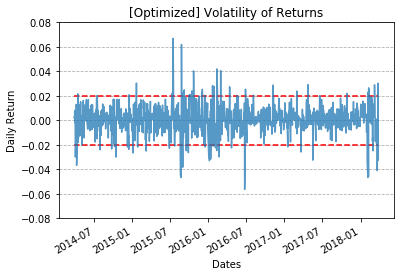

In [14]:
# [View] Volatility of Portfolio Returns
pfolio_eval["RTNp"].plot(alpha=.75)
plt.title("[Optimized] Volatility of Returns")
plt.xlabel("Dates")
plt.ylabel("Daily Return")
plt.ylim(-.08, .08)
plt.grid(axis="y", linestyle="dashed")
plt.hlines(.02, xmin, xmax, linestyle="dashed", colors="red")
plt.hlines(-.02, xmin, xmax, linestyle="dashed", colors="red")

In [ ]:
# [View] Volatility of Market Returns
pfolio_eval["RTNm"].plot(alpha=.75)
plt.title("[S&P500] Volatility of Returns")
plt.xlabel("Date")
plt.ylabel("Daily Returns")
plt.ylim(-.08, .08)
plt.grid(axis="y", linestyle="dashed")
plt.hlines(.02, xmin, xmax, linestyle="dashed", colors="red")
plt.hlines(-.02, xmin, xmax, linestyle="dashed", colors="red")

In [ ]:
# Calculate Portfolio Beta -- Show The Correlation of Returns
# Explanation as to Why On an Absolute Basis Portfolio Underpeforms Only Slightly


In [ ]:
rtn_df = pfolio_eval["RTNp"].apply(lambda x: x + 1).reset_index()

In [ ]:
rtn_df.head()

In [ ]:
rtn_df.iloc[0]["Date"].date()

In [ ]:
mkt_val = [(row[1][0].date(), row[1][1]) for row in rtn_df.iterrows()]

In [ ]:
mkt_val[:10]

In [ ]:
pfolio_eval.describe()